# Qubit simulation

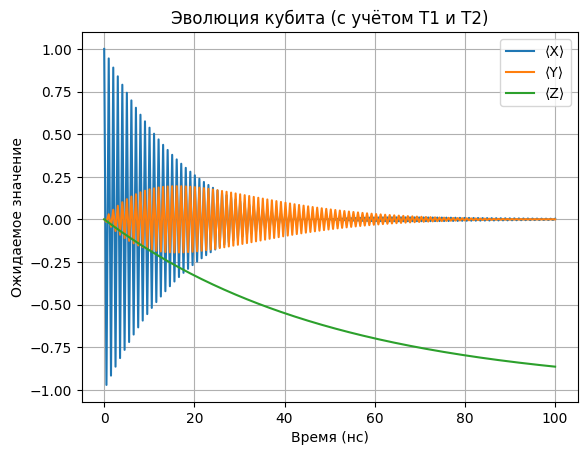

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Параметры
T1 = 50  # релаксация (условные нс)
T2 = 30  # декогеренция
w = 2 * np.pi * 1.0  # частота кубита (в ГГц)
times = np.linspace(0, 100, 200)

# Начальное состояние — суперпозиция |+>
psi0 = (basis(2, 0) + basis(2, 1)).unit()

# Гамильтониан: вращение вокруг оси Z
H = 0.5 * w * sigmaz()

# Коллапс-операторы для T1 и T2
c_ops = []
if T1 > 0.0:
    c_ops.append(np.sqrt(1.0 / T1) * sigmam())
if T2 > 0.0:
    c_ops.append(np.sqrt(1.0 / T2 - 1.0 / (2 * T1)) * sigmaz())

# Эволюция
result = mesolve(H, psi0, times, c_ops, [sigmax(), sigmay(), sigmaz()])

# График
plt.plot(times, result.expect[0], label="⟨X⟩")
plt.plot(times, result.expect[1], label="⟨Y⟩")
plt.plot(times, result.expect[2], label="⟨Z⟩")
plt.title("Эволюция кубита (с учётом T1 и T2)")
plt.xlabel("Время (нс)")
plt.ylabel("Ожидаемое значение")
plt.legend()
plt.grid()
plt.show()

# Task: Single-qubit Rabi calibration using QUA/controller

Write (in pseudocode or QUA-like Python) a procedure for calibrating the amplitude of a single-qubit X-gate using Rabi oscillations.

## task:

- Generate a series of pulses with different amplitudes.

- Send them to the qubit.

- Measure the qubit response.

- Plot the dependence of the measurement result on the amplitude.

- Select the optimal amplitude for the π-pulse (X-gate).

## Conditions:
- You work with one qubit.

- You can send pulses with an amplitude amp and a fixed duration = 40 ns.

- You have a function play_pulse(amp) that sends a pulse.

- Measurement — measure_qubit() — returns 0 or 1.

- Repeat each experiment n_avg = 1000 times for averaging.

## Expected steps:
Trip through amplitudes, for example from 0 to 0.8 with a step of 0.05.

For each amplitude:

Repeat n times: prepare qubit → send pulse → measure → save result.

Plot: amplitude → probability of getting |1⟩.

Find the amplitude at which the probability is maximum → this is a π-pulse (X-gate).

In [2]:
from numpy import linspace, mean
import matplotlib.pyplot as plt

amplitudes = linspace(0.0, 0.8, 20)
n_avg = 1000
results = []

for amp in amplitudes:
    shots = []
    for _ in range(n_avg):
        reset_qubit()                 # приведение к |0⟩
        play_pulse(amplitude=amp)    # фиксированная длительность
        result = measure_qubit()     # 0 или 1
        shots.append(result)
    p_excited = mean(shots)          # вероятность быть в |1⟩
    results.append(p_excited)

# Визуализация
plt.plot(amplitudes, results)
plt.xlabel("Amplitude")
plt.ylabel("P(|1⟩)")
plt.title("Rabi Oscillations")
plt.grid(True)
plt.show()


NameError: name 'reset_qubit' is not defined

# Task (Ramsey interferometry)

Implement the Ramsey interferometry procedure for a single qubit to:

Determine the qubit frequency with high accuracy.

Estimate the phase decoherence time — T₂*.

Plot the corresponding graph and extract useful parameters.

## Brief physical idea (basis):
- Apply a π/2 pulse → put the qubit into a superposition of (|0⟩ + |1⟩)/√2.

- Wait for τ → the phase will accumulate, depends on ∆f (frequency difference).

- Apply another π/2 pulse → interference.

- Measure → the result will fluctuate depending on τ.

## If you repeat with different τ, you get an interference pattern, from which you can:

- Extract the qubit frequency (from the oscillation period)

- Estimate T₂* (from the decaying envelope)

## Conditions:
The qubit is controlled by a QUA-like code.

You have:

play_pulse(theta, phase) — generates a pulse with rotation θ and phase ϕ.

wait(delay_ns) — delay in nanoseconds.

measure() — returns 0 or 1.

Repeat each experiment n_avg = 1000 times.

Make measurements for different τ in a range, for example from 0 to 1000 ns with a step of 20 ns.

## Expected steps:
- Walk through τ (the delay time between two π/2).

- For each τ:

- - Apply π/2 pulse (along the X axis)

- - Wait τ

- - Apply π/2 pulse (along the X or Y axis - you can vary the phase)

- Measure

- Average over n_avg

- Plot P(|1⟩) as a function of τ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delays_ns = np.arange(0, 1000, 20)
n_avg = 1000
results = []

for tau in delays_ns:
    shots = []
    for _ in range(n_avg):
        reset_qubit()

        play_pulse(theta=np.pi/2, phase=0)   # π/2 по оси X
        wait(tau)                             # задержка τ
        play_pulse(theta=np.pi/2, phase=0)   # снова π/2 по X
        result = measure()
        shots.append(result)

    p1 = np.mean(shots)
    results.append(p1)

plt.plot(delays_ns, results)
plt.xlabel("Delay τ (ns)")
plt.ylabel("P(|1⟩)")
plt.title("Ramsey Interferometry")
plt.grid(True)
plt.show()